In [1]:
import numpy as np
import matplotlib.pyplot as plt

print("📊 K-Means Clustering from Scratch\n")

📊 K-Means Clustering from Scratch



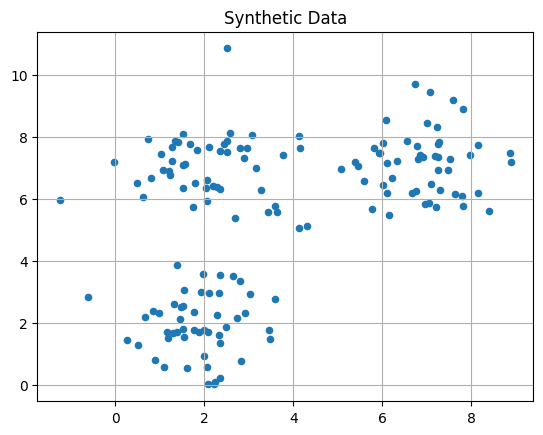

In [2]:
# ✅ 1. Generate synthetic 2D data to simulate clusters
np.random.seed(42)  # For reproducibility

def generate_data():
    # Create 3 clusters with 50 points each
    cluster_1 = np.random.randn(50, 2) + [2, 2]
    cluster_2 = np.random.randn(50, 2) + [7, 7]
    cluster_3 = np.random.randn(50, 2) + [2, 7]
    # Stack all clusters vertically into one dataset
    return np.vstack((cluster_1, cluster_2, cluster_3))

# Generate the data
X = generate_data()

# Visualize the raw data
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.title("Synthetic Data")
plt.grid(True)
plt.show()

In [3]:
# ✅ 2. Randomly initialize K centroids from the dataset
def initialize_centroids(X, k):
    # Randomly choose k unique data points as initial centroids
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]

In [4]:
# ✅ 3. Assign each data point to the nearest centroid
def assign_clusters(X, centroids):
    # Compute Euclidean distance from each point to every centroid
    # Shape: (num_points, num_centroids)
    dists = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    # Assign to the closest centroid (index of the minimum distance)
    return np.argmin(dists, axis=1)

In [5]:
# ✅ 4. Recalculate centroids as the mean of points in each cluster
def update_centroids(X, labels, k):
    # For each cluster, take the mean of points assigned to it
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

In [6]:
# ✅ 5. Full K-means algorithm
def kmeans(X, k=3, max_iters=100, tol=1e-4):
    # Step 1: Initialize centroids
    centroids = initialize_centroids(X, k)
    
    for i in range(max_iters):
        # Step 2: Assign data points to the closest centroid
        labels = assign_clusters(X, centroids)

        # Step 3: Compute new centroids
        new_centroids = update_centroids(X, labels, k)

        # Step 4: Check for convergence
        # If centroids have moved less than `tol`, stop
        if np.allclose(centroids, new_centroids, atol=tol):
            break

        centroids = new_centroids

    return centroids, labels

In [7]:
# ✅ 6. Run K-means on the generated dataset
final_centroids, final_labels = kmeans(X, k=3)

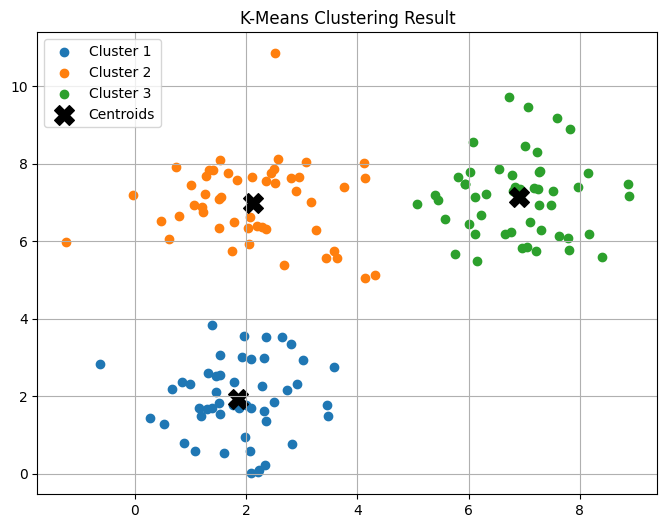

In [8]:
# ✅ 7. Visualize the clustered results
plt.figure(figsize=(8, 6))

# Plot each cluster with a different color
for i in range(3):
    plt.scatter(X[final_labels == i, 0], X[final_labels == i, 1], label=f"Cluster {i+1}")

# Plot final centroids as large black 'X'
plt.scatter(final_centroids[:, 0], final_centroids[:, 1],
            c='black', s=200, marker='X', label='Centroids')

plt.title("K-Means Clustering Result")
plt.legend()
plt.grid(True)
plt.show()